In [1]:
%display latex

Queremos dibujar:

$$u(x,t)= \frac{\sqrt{2}}{2}\sin(\pi x)E_{\alpha,1}(-\pi^2 t^\alpha).$$

$$u_{\beta}(x,t)=\sum\limits_{k=1}^{\infty} \left( u_{0},\psi_{k}(\beta;\cdot)\right) A_{k}(\beta)\left(\sin\sqrt{\lambda_{k}(\beta)}x+ \frac{\sqrt{\lambda_{k}(\beta)}}{\beta} \cos\sqrt{\lambda_{k}(\beta)}x \right) E_{\alpha,1}(-\lambda_{k}(\beta) t^\alpha).$$

$$\psi_{k}(\beta;x)=A_{k}(\beta)\left( \sin\sqrt{\lambda_{k}(\beta)}x+ \frac{\sqrt{\lambda_{k}(\beta)}}{\beta} \cos\sqrt{\lambda_{k}(\beta)}x\right),$$

$$A_{k}(\beta)=\frac{\sqrt{2}\beta}{\sqrt{\beta^2+\beta+\lambda_{k}(\beta)}}.$$


La M-L sería hasta 75 términos.
$\alpha$ ponemos 0.8.
$\beta$ serán valores $10^{k}$, con $k$ de 2 a 7, más grande no aparecen cambios significativos ni en gráfica ni numéricos (por la precisión que manejamos).
La $u_{0}$ ponemos $\sin(\pi x)$.

In [2]:
reset()
x=var('x')

Fijamos un valor para $\alpha$

In [3]:
alpha=0.8

Fijamos el dato inicial $f=u_0$

In [4]:
f=sin(pi*x)

In [5]:
n=var('n')
g=sqrt(2)*sin(n*pi*x)

In [6]:
integrate(g.subs(n=1)*g.subs(n=1),x,0,1)

1

In [7]:
coefD=integrate(f*g.subs(n=1),x,0,1)
coefD

1/2*sqrt(2)

Aún no ponemos valor a $\beta$, pero iremos viendo cómo se van acercando los ceros de las funciones h_{\beta} a los autovalores del Dirichlet.

In [8]:
beta=var('beta')

Ver si cambiamos el algo de  $\beta^{algo}$, cómo se acercan los ceros de $h$ y  los autovalores del Dirichlet, donde 
$$h_{\beta}(\lambda)=2\sqrt{\lambda}\cos(\sqrt{\lambda})+(\beta-\frac{\lambda}{\beta})\sin(\sqrt{\lambda}).$$

Los puntos gordos rojos son los autovalores de la Dirichlet, de la forma $(n\pi)^2$. Los puntos chiquitos azul las raíces de cada función $h_{\beta}$ para los valores de $\beta=10^k$, con $k$ entre 3 y 7, que va cambiando de color. Abajo las dibujamos todas juntas. Pusimos un rango máximo para los valores de $|h_{\beta}(\lambda)|<10000$, de modo que se aprecie la gráfica.

In [9]:
graficas =[]
for k in range(2,7):
    beta=10^k
    h=2*sqrt(x)*cos(sqrt(x))+(beta-(x/beta))*sin(sqrt(x))
    LAR=[ h.find_root(((n*pi)**2-n*pi-n) , ((n*pi)**2+n*pi+n)) for n in range(1,11) ]
    LAR=[0]+LAR
    Graf1=h.plot(0,1000,hue=sin(k), xmin=0, xmax=1000, ymin=-10000, ymax=10000, title='Functions and its roots for increasing beta',legend_label='beta=10^'+str(k))
    Graf2=point([(n**2*pi**2,0) for n in range(11)], color='red', frame=True, size='60',xmin=0, xmax=1000, ymin=-10000, ymax=10000)
    Graf3=point([(LAR[n],0)for n in range(11)], color='blue', frame=True, size='10',xmin=0, xmax=1000, ymin=-10000, ymax=10000)
    graficas=graficas +[Graf1+Graf2+Graf3]

Animation with 5 frames
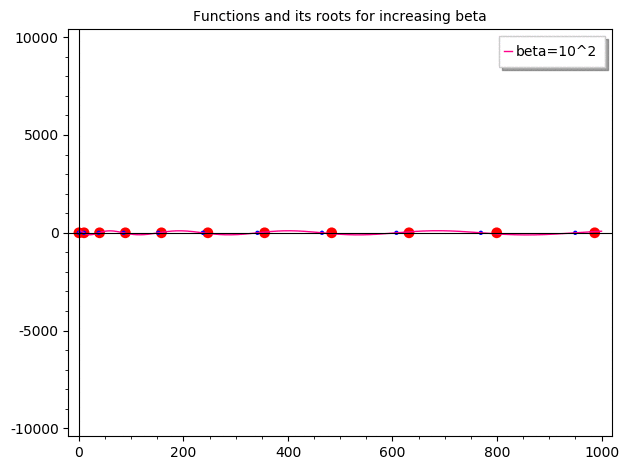

In [10]:
a = animate(graficas)
a.show(delay=100)

Las dibujamos ahora sobre una misma gráfica.

In [11]:
gre=sum(graficas[k] for k in range(5))

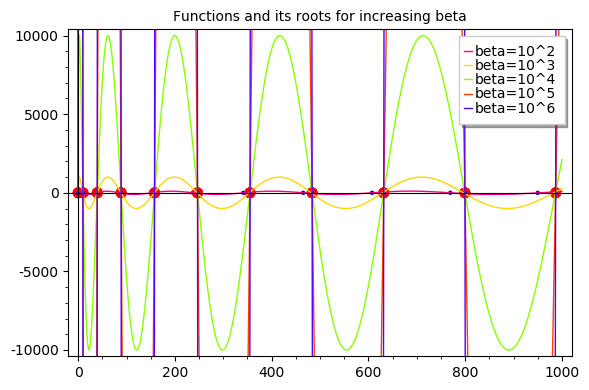

In [12]:
gre

Si no le ponemos el rango máximo de valores para las imágenes de $h_{\beta}$ podemos apreciar cómo las gráficas son similares.

In [13]:
graficasv2 =[]
for k in range(2,7):
    beta=10^k
    h=2*sqrt(x)*cos(sqrt(x))+(beta-(x/beta))*sin(sqrt(x))
    LAR=[ h.find_root(((n*pi)**2-n*pi-n) , ((n*pi)**2+n*pi+n)) for n in range(1,11) ]
    LAR=[0]+LAR
    Graf1=h.plot(0,1000,hue=sin(k), linestyle=':', xmin=0, xmax=1000, title='Función h para beta creciente')
    Graf2=point([(n**2*pi**2,0) for n in range(11)], color='red', frame=True, size='60',xmin=0, xmax=1000,)
    Graf3=point([(LAR[n],0)for n in range(11)], color='blue', frame=True, size='10',xmin=0, xmax=1000)
    graficasv2=graficasv2 +[Graf1+Graf2+Graf3]

Animation with 5 frames
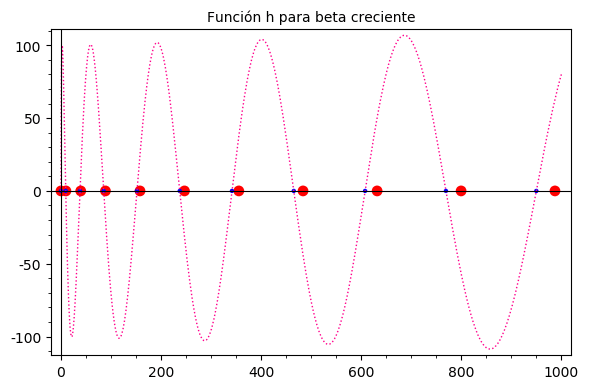

In [14]:
av2 = animate(graficasv2)
av2.show(delay=100)

Hagamos ahora un "zoom" para ver cómo se acercan los autovalores correspondientes a los problemas de Robin hacia los Dirichlet. Consideremos el primer autovalor: $\pi^2$.

In [15]:
Graf2=point([(pi**2,0)], color='red', frame=True, size='60',xmin=9.4, xmax=10.4, ymin=-5, ymax=5, legend_label='pi^2')
graficasz =[Graf2]
for k in range(2,7):
    beta=10^k
    h=2*sqrt(x)*cos(sqrt(x))+(beta-(alpha/beta))*sin(sqrt(x))
    Graf1=h.plot(0,10,hue=sin(k),xmin=9.4, xmax=10.4, ymin=-5, ymax=5, title='Roots of h around pi^2 for increasing beta', legend_label='beta=10^'+str(k))
    Graf3=point([(h.find_root(9,10),0)], hue=sin(k), frame=True, size='30',xmin=9.4, xmax=10.4, ymin=-5, ymax=5, legend_label='lambda_'+str(k)+'(beta)')
    graficasz=graficasz +[Graf1+Graf3 ]

Animation with 6 frames
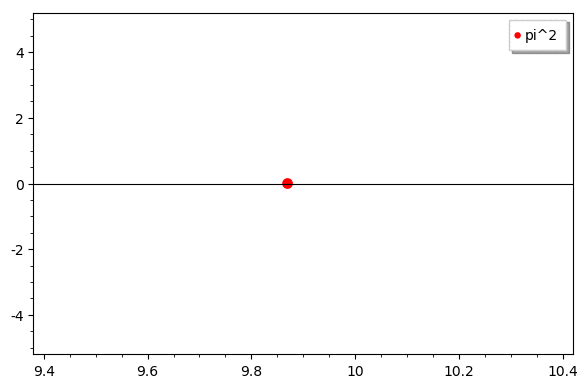

In [16]:
b = animate(graficasz)
b.show(delay=100)

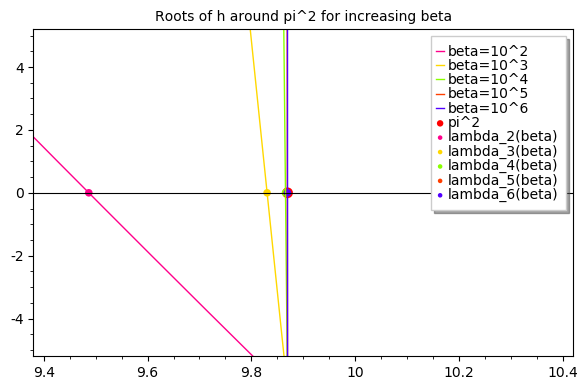

In [17]:
grez=sum(graficasz[k] for k in range(6))
grez

Armemos la tabla de autovalores de las Robin de acuerdo al $\beta$:

In [18]:
sigma=var('sigma')
TAR=[]
for k in range(2,7):
    beta=10^k
    h=2*sqrt(sigma)*cos(sqrt(sigma))+(beta-(sigma/beta))*sin(sqrt(sigma))
    LAR=[ h.find_root(((n*pi)**2-n*pi-n) , ((n*pi)**2+n*pi+n)) for n in range(1,11) ]
    LAR=[0]+LAR
    TAR=TAR+[LAR]

In [19]:
#TAR

In [20]:
latex(TAR)

\left[\left[0, 9.486473204354636, 37.947300586356484, 85.38668247637568, 151.81154366014752, 237.23142256188495, 341.6583215827786, 465.106523676983, 607.5923811691522, 769.1340834087115, 949.7514101063598\right], \left[0, 9.830244232285144, 39.32097847214837, 88.47220734834096, 157.28393857454202, 245.75618294799932, 353.8889543476271, 481.68226973156146, 629.1361491341755, 796.2506156625528, 983.0256954924237\right], \left[0, 9.865657743495444, 39.4626309755388, 88.790919700801, 157.85052392706697, 246.64144366523558, 355.1636789293196, 483.4172297364459, 631.4020961068549, 799.1182780639009, 986.5657756340524\right], \left[0, 9.869209628756645, 39.47683851502818, 88.82288665881924, 157.90735406013766, 246.73024071899428, 355.2915466354031, 483.5912718093815, 631.6294162409495, 799.4059799301306, 986.9209628769511\right], \left[0, 9.869564922790182, 39.47825969116075, 88.8260843051117, 157.91303876464306, 246.7391230697548, 355.30433722044694, 483.60868121671956, 631.6521550585727, 799.4347587460061, 986.9564922790203\right]\right]

In [21]:
for k in range(1,11)
h=2*sqrt(sigma)*cos(sqrt(sigma))+(beta-(sigma/beta))*sin(sqrt(sigma))

SyntaxError: invalid syntax (<ipython-input-21-28d58725a863>, line 1)

A modo ilustrativo, trabajemos con un valor fijo de $\beta$, digamos $\beta=10^2$. Armamos la lista de autovalores.

In [ ]:
beta=10**2

In [ ]:
sigma=var('sigma')
h=2*sqrt(sigma)*cos(sqrt(sigma))+(beta-(sigma/beta))*sin(sqrt(sigma))
LAR=[ h.find_root(((n*pi)**2-n*pi-n) , ((n*pi)**2+n*pi+n)) for n in range(1,11) ]
LAR=[0]+LAR

In [ ]:
LAR

Para construir las autofunciones $$\psi_{k}(\beta;x)=A_{k}(\beta)\left( \sin\sqrt{\lambda_{k}(\beta)}x+ \frac{\sqrt{\lambda_{k}(\beta)}}{\beta} \cos\sqrt{\lambda_{k}(\beta)}x\right),$$ debemos primero calcular los coeficientes
$$A_{k}(\beta)=\frac{\sqrt{2}\beta}{\sqrt{\beta^2+\beta+\lambda_{k}(\beta)}}.$$

In [ ]:
A=[ (sqrt(2)*beta)/(sqrt(beta^2+beta+LAR[n])) for n in range(11)]
A

In [ ]:
psiR=[ A[n]*(sin(sqrt(LAR[n])*x) + (sqrt(LAR[n])/beta)*cos(sqrt(LAR[n])*x))  for n in range(11)]
psiR

Para armar las serie de Fourier que dan las soluciones del Robin calculamos los coeficientes $$(u_0,\psi_{k}(\beta,\cdot)).$$

In [ ]:
coefR=[ integrate(f*psiR[n],x,0,1) for n in range(11)]
coefR

Vamos a ver si ponemos las Mittag-Leffler a partir de una fórmula del trabajo "COMPUTATION OF THE MITTAG-LEFFLER FUNCTIONEα,β(z)AND ITS DERIVATIVE Rudolf Gorenflo1, Joulia Loutchko1& Yuri Luchko". 
No usamos la fórmula porque por alguna razón para valores grandes negativos del argumento, Sagemath no puede hacer los cálculos (algo de que se suman los errores y crece muy rápido, al calcular un polinomio en el numerador y una gamma en el denominador).

Para concluír faltan los factores que dan las Mittag-Leffler. Implementamos un algoritmo de https://stackoverflow.com/questions/48645381/instability-in-mittag-leffler-function-using-numpy que parece resolver algunos problemas que trae la definición directa en SageMath para valores negativos grandes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.integrate import quad

def MLf(z, a):
    """Mittag-Leffler function
    """
    z = np.atleast_1d(z)
    if a == 0:
        return 1/(1 - z)
    elif a == 1:
        return np.exp(z)
    elif a > 1 or all(z > 0):
        k = np.arange(100)
        return np.polynomial.polynomial.polyval(z, 1/gamma(a*k + 1))

    # a helper for tricky case, from Gorenflo, Loutchko & Luchko
    def _MLf(z, a):
        if z < 0:
            f = lambda x: (np.exp(-x**(1/a)))/(x**2 - 2*x*z*cos(np.pi*a) + z**2)
            return np.sin(np.pi*a)* (-z)/(np.pi*a) * quad(f, 0, np.inf)[0]
        elif z == 0:
            return 1
        else:
            return MLf(z, a)
    return np.vectorize(_MLf)(z, a)

Vamos a armar la solución de la Dirichlet:
$$u(x,t)= \sin(\pi x)E_{\alpha,1}(-\pi^2 t^\alpha).$$

Para esta implementación de la Mittag-Leffler consideramos un valor de $t$ fijo, digamos $t=0.5$. 

In [ ]:
E=MLf(-((pi)**2)*(0.5)**alpha,alpha)[0]
E

In [ ]:
uD=sin(pi*x)*E

In [ ]:
uD.plot(0,1)

In [ ]:
ER=[ MLf(-LAR[n]*(0.5)**alpha,alpha)[0]  for n in range(11)]


In [ ]:
usubR=[ coefR[n]*psiR[n]*ER[n] for n in range(11) ]

In [ ]:
uR=sum( usubR[n] for n in range(11))

In [ ]:
uR.plot(0,1)

In [ ]:
uR.plot(0,1)+uD.plot(0,1,color='red')

Veamos ahora esta construcción para $beta=10^3$ y $\beta=10^4$

In [ ]:
uRbeta2=uR
GRbeta2=uRbeta2.plot(0,1)

In [ ]:
beta=10**3
h=2*sqrt(sigma)*cos(sqrt(sigma))+(beta-(sigma/beta))*sin(sqrt(sigma))
LAR=[ h.find_root(((n*pi)**2-n*pi-n) , ((n*pi)**2+n*pi+n)) for n in range(1,11) ]
LAR=[0]+LAR
A=[ (sqrt(2)*beta)/(sqrt(beta^2+beta+LAR[n])) for n in range(11)]
psiR=[ A[n]*(sin(sqrt(LAR[n])*x) + (sqrt(LAR[n])/beta)*cos(sqrt(LAR[n])*x))  for n in range(11)]
coefR=[ integrate(f*psiR[n],x,0,1) for n in range(11)]
ER=[ MLf(-1*LAR[n]*(0.5)**alpha,alpha)[0]  for n in range(11)]
usubR=[ coefR[n]*psiR[n]*ER[n] for n in range(11) ]
uR=sum( usubR[n] for n in range(11))


In [ ]:
uRbeta3=uR
GRbeta3=uRbeta3.plot(0,1)

In [ ]:
beta=10**4
h=2*sqrt(sigma)*cos(sqrt(sigma))+(beta-(sigma/beta))*sin(sqrt(sigma))
LAR=[ h.find_root(((n*pi)**2-n*pi-n) , ((n*pi)**2+n*pi+n)) for n in range(1,11) ]
LAR=[0]+LAR
A=[ (sqrt(2)*beta)/(sqrt(beta^2+beta+LAR[n])) for n in range(11)]
psiR=[ A[n]*(sin(sqrt(LAR[n])*x) + (sqrt(LAR[n])/beta)*cos(sqrt(LAR[n])*x))  for n in range(11)]
coefR=[ integrate(f*psiR[n],x,0,1) for n in range(11)]
ER=[ MLf(-1*LAR[n]*(0.5)**alpha,alpha)[0]  for n in range(11)]
usubR=[ coefR[n]*psiR[n]*ER[n] for n in range(11) ]
uR=sum( usubR[n] for n in range(11))
GuR=uR.plot(0,1)

In [ ]:
uRbeta4=uR
GRbeta4=uRbeta4.plot(0,1)

In [ ]:
GR=GRbeta2+GRbeta3+GRbeta4+uD.plot(0,1,color='red')

In [ ]:
GR

Ahora hagamos sólo un término a ver si hay marcada diferencia, para $beta=10^l$ con $l=1,2,3,4,5$

In [ ]:
LSR=[]
GSR=[]
for k in range(1,6):
    beta=10^k
    h=2*sqrt(sigma)*cos(sqrt(sigma))+(beta-(sigma/beta))*sin(sqrt(sigma))
    av=h.find_root(((pi)**2-pi-1) , ((pi)**2+pi+1))
    a=(sqrt(2)*beta)/(sqrt(beta^2+beta+av))
    pR=a*(sin(sqrt(av)*x) + (sqrt(av)/beta)*cos(sqrt(av)*x))
    co=integrate(f*pR,x,0,1)
    e=MLf(-1*av*(0.5)**alpha,alpha)[0]
    soluR=co*pR*e
    grsoluR=soluR.plot(0,1,hue=sin(k),legend_label='beta=10^'+str(k),ymin=0,ymax=0.1)
    LSR=LSR+[soluR]
    GSR=GSR+[grsoluR]
GSR=GSR+[uD.plot(0,1, ymin=0,ymax=0.1,legend_label='uDirichlet', title='Solutions of the Dirichlet and Robin problems with t=0.5 ')]

In [ ]:
c = animate(GSR)
c.show(delay=100)

In [ ]:
todas=sum(GSR[k] for k in range(0,5))+uD.plot(0,1, legend_label='uDirichlet', title='Solutions of the Dirichlet and Robin problems with t=0.5 ')
todas

In [ ]:
LSR=[]
GSR=[]
for k in range(1,6):
    beta=10^k
    h=2*sqrt(sigma)*cos(sqrt(sigma))+(beta-(sigma/beta))*sin(sqrt(sigma))
    av=h.find_root(((pi)**2-pi-1) , ((pi)**2+pi+1))
    a=(sqrt(2)*beta)/(sqrt(beta^2+beta+av))
    pR=a*(sin(sqrt(av)*x) + (sqrt(av)/beta)*cos(sqrt(av)*x))
    co=integrate(f*pR,x,0,1)
    e=MLf(-1*av*(0.5)**alpha,alpha)[0]
    soluR=co*pR*e
    grsoluR=soluR.plot(0,1,hue=sin(k),legend_label='beta=10^'+str(k))
    LSR=LSR+[soluR]
    GSR=GSR+[grsoluR]
    

Intento de hacer un dibujoo 3D. Trae problemas la ML.

In [ ]:
plot3d?

In [ ]:
t=var('t')
beta=10^2
h=2*sqrt(sigma)*cos(sqrt(sigma))+(beta-(sigma/beta))*sin(sqrt(sigma))
av=h.find_root(((pi)**2-pi-1) , ((pi)**2+pi+1))
a=(sqrt(2)*beta)/(sqrt(beta^2+beta+av))
pR=a*(sin(sqrt(av)*x) + (sqrt(av)/beta)*cos(sqrt(av)*x))
co=integrate(f*pR,x,0,1)
e=MLf(-1*av*t**alpha,alpha)[0]
soluR=co*pR*e
grsoluR=soluR.plot3d((x,0,1),(t,0,1))

Ahora cheuqeamos quevalen las condiciones de borde tipo Dirichlet y tipo Robin

In [ ]:
uD.subs(x=0), uD.subs(x=1)

In [ ]:
(-1)*derivative(uR,x).subs(x=1).n()

In [ ]:
beta*uR.subs(x=1).n()

In [ ]:
(-1)*derivative(uR,x).subs(x=0).n()

In [ ]:
beta*uR.subs(x=0).n()

In [ ]:
usubR[4].plot(0,1)